In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 50
tau = 0.02
L = 1.0
h = L/N
c = 1.0

print('Time to move one grid spacing is ',h/c)

coeff = -c*tau/(2.0*h)
coeff2 = c**2*tau**2/(2.0*h**2)

print ('Wave circles system in ', L/(c*tau),' steps.')

print ('Coefficient = ',coeff)
print ('Coefficient2 = ',coeff2)

print ('Lax stability criterion tau_max = ', h/c)

nStep = 100

Time to move one grid spacing is  0.02
Wave circles system in  50.0  steps.
Coefficient =  -0.5
Coefficient2 =  0.5
Lax stability criterion tau_max =  0.02


In [3]:
#
# Initial conditions
#
sigma = 0.1
k_wave = np.pi/sigma
x = np.arange(N)*h - L/2.0

a = np.empty(N)
for i in range(N):
    a[i]=np.cos(k_wave*x[i]) * np.exp(-x[i]**2/(2.0*sigma**2))
    
ip = np.arange(N) + 1
ip[N-1] = 0
im = np.arange(N) - 1
im[0] = N-1

In [4]:
iplot = 1
nplots = 50

In [5]:
aplot = np.empty((N,nplots))
tplot = np.empty(nplots)
aplot[:,0] = np.copy(a)
tplot[0] = 0
plotStep = nStep/nplots + 1

for istep in range(nStep):
    
    a[:] = a[:] + coeff*(a[ip]-a[im]) + coeff2*(a[ip]+a[im]-2.0*a[:])
    
    if (istep+1) % plotStep < 1:
        aplot[:,iplot] = np.copy(a)
        tplot[iplot] = (istep+1)*tau
        iplot += 1
        print (istep,' out of ',nStep,' steps completed')

2  out of  100  steps completed
5  out of  100  steps completed
8  out of  100  steps completed
11  out of  100  steps completed
14  out of  100  steps completed
17  out of  100  steps completed
20  out of  100  steps completed
23  out of  100  steps completed
26  out of  100  steps completed
29  out of  100  steps completed
32  out of  100  steps completed
35  out of  100  steps completed
38  out of  100  steps completed
41  out of  100  steps completed
44  out of  100  steps completed
47  out of  100  steps completed
50  out of  100  steps completed
53  out of  100  steps completed
56  out of  100  steps completed
59  out of  100  steps completed
62  out of  100  steps completed
65  out of  100  steps completed
68  out of  100  steps completed
71  out of  100  steps completed
74  out of  100  steps completed
77  out of  100  steps completed
80  out of  100  steps completed
83  out of  100  steps completed
86  out of  100  steps completed
89  out of  100  steps completed
92  out of  1

In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

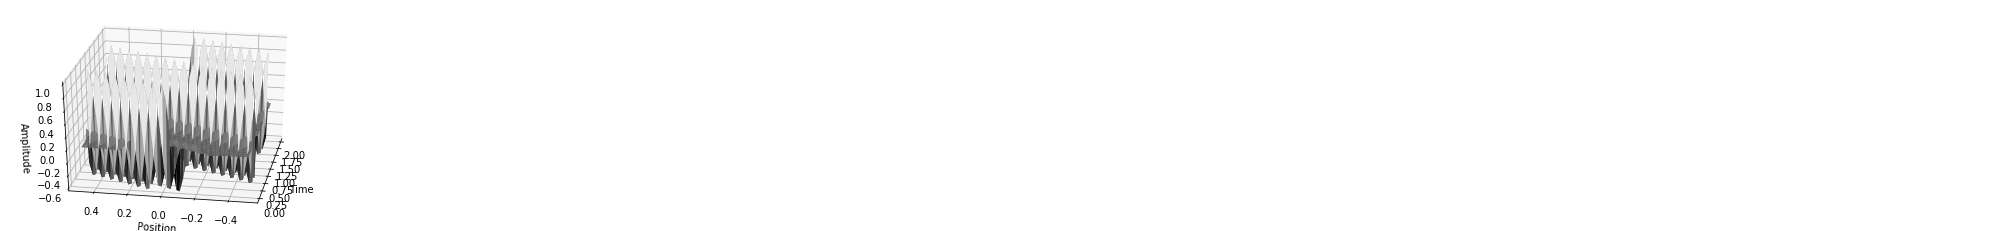

In [7]:
fig = plt.figure()
ax = fig.gca(projection = '3d')
Tp, Xp = np.meshgrid(tplot[0:iplot], x)
ax.plot_surface(Tp,Xp,aplot[:,0:iplot],rstride=1,cstride=1,cmap=cm.gray)
ax.view_init(elev=30.,azim=190.)
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.set_zlabel('Amplitude')
plt.show()

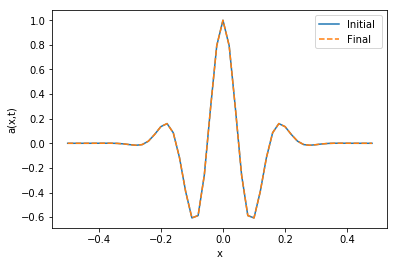

In [8]:
plt.plot(x,aplot[:,0],'-',x,a,'--')
plt.legend(['Initial ','Final'])
plt.xlabel('x')
plt.ylabel('a(x,t)')
plt.show()